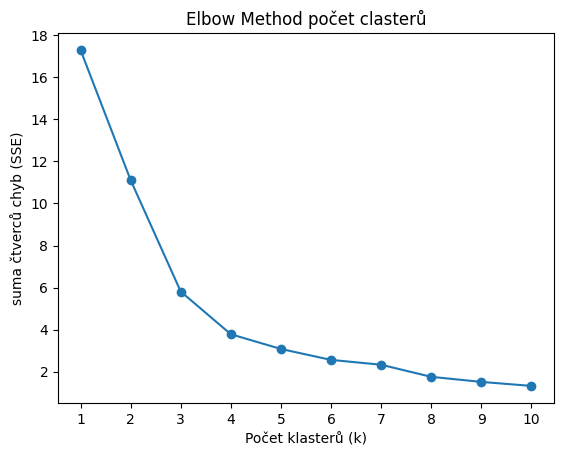

In [22]:
from sklearn.cluster import KMeans

# suma čtverců chyb
def calculate_sse(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    return kmeans.inertia_

# Elbow Method
sse = []
k_range = range(1, 11)

for k in k_range:
    sse.append(calculate_sse(X, k))

# Vyzualizace
plt.plot(k_range, sse, marker='o')
plt.title("Elbow Method počet clasterů")
plt.xlabel('Počet klasterů (k)')
plt.ylabel('suma čtverců chyb (SSE)')
plt.xticks(k_range)
plt.show()


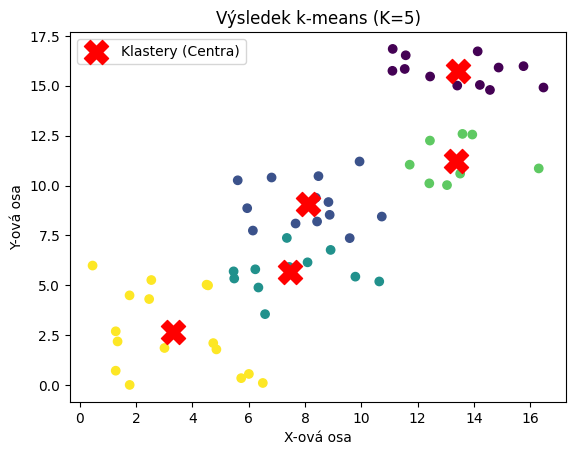

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Cesta: sample_data/k_mean_points.npy

loaded_points = np.load('sample_data/k_mean_points.npy')


# Funkce výpočtu vzdálenosti
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

#  K-means algoritmus
def k_means(X, k, max_iters=100):
    # Náhodný centroid
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    #
    labels = np.zeros(X.shape[0])

    for _ in range(max_iters):
        # Klasterizace
        for i in range(X.shape[0]):
            distances = [distance(X[i], centroid) for centroid in centroids]
            labels[i] = np.argmin(distances)

        # Nový centroid
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Jestli centriody se nezměnil, vystupujeme z cyklu
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

k = 5  # Počet klasteru
centroids, labels = k_means(loaded_points, k)

# Vizualizace
plt.scatter(loaded_points[:, 0], loaded_points[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Klastery (Centra)')
plt.title(f"Výsledek k-means (K={k})")
plt.xlabel('X-ová osa')
plt.ylabel('Y-ová osa')
plt.legend()
plt.show()
